In [618]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [619]:
import seaborn as sns

In [620]:
cust = pd.read_csv('Mall_Customers.csv')

In [621]:
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [622]:
cust_df = pd.DataFrame(data=cust)

In [623]:
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [624]:
new_cust =pd.get_dummies(data=cust_df,columns=['Gender'],drop_first=True)

In [625]:
new_cust.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False


In [626]:
mapping = {True:1, False:0}

In [627]:
new_cust['Gender_Male'] = new_cust['Gender_Male'].map(mapping)

In [628]:
new_cust.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [629]:
new_cust.isnull().values.sum()

0

In [630]:
cust_data = new_cust.drop('CustomerID',axis=1)

In [631]:
cust_data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [632]:
cust_data.shape

(200, 4)

In [633]:
cust_data.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_Male               0
dtype: int64

In [634]:
from sklearn.cluster import KMeans
import numpy as np

In [635]:
clusters = []

In [636]:
from sklearn.preprocessing import StandardScaler

In [637]:
scaler = StandardScaler()

In [638]:
cust_data.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male'], dtype='object')

In [639]:
cust_data = scaler.fit_transform(cust_data[['Annual Income (k$)', 'Spending Score (1-100)']])

In [640]:
cust_data_scaled = pd.DataFrame(cust_data,columns=[['Annual Income (k$)', 'Spending Score (1-100)']])

In [641]:
cust_data_scaled.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [642]:
from sklearn.decomposition import PCA

In [643]:
cust_data_scaled.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [644]:
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,random_state=42,n_init=20)
    kmeans.fit(cust_data_scaled)
    clusters.append(kmeans.inertia_)

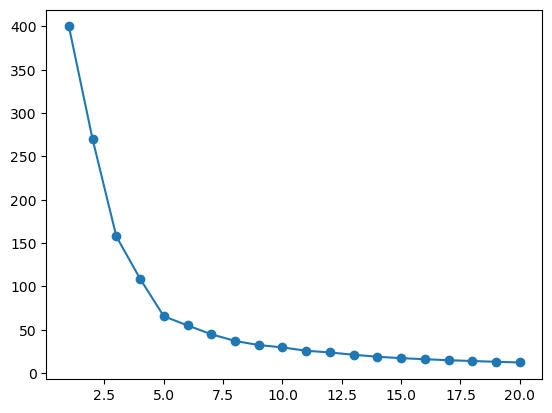

In [645]:
plt.plot(range(1,21),clusters,marker='o')

In [646]:
optimal_clusters = 5

In [647]:
cust_data_scaled.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [648]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)  
cust_data_scaled['Cluster'] = kmeans.fit_predict(cust_data_scaled)

In [649]:
cust_data_scaled.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,2
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,2
4,-1.662660,-0.395980,4


Text(0.5, 1.0, 'Customer Segments')

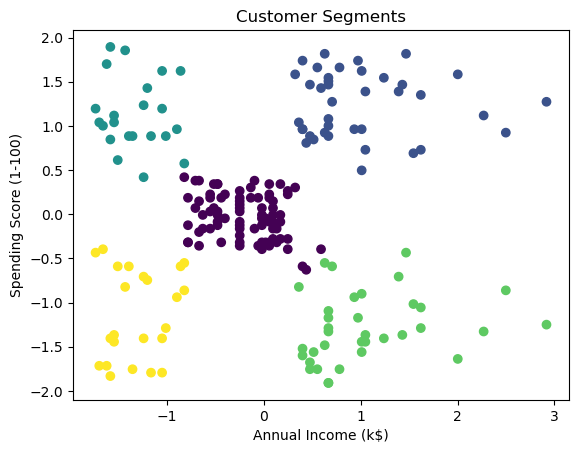

In [650]:
plt.scatter(cust_data_scaled['Annual Income (k$)'], cust_data_scaled['Spending Score (1-100)'], c=cust_data_scaled['Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')

In [651]:
from sklearn.metrics import silhouette_score

In [652]:
silhouette_avg = silhouette_score(cust_data_scaled, cust_data_scaled['Cluster'])

C:\Users\harir\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [653]:
silhouette_avg

0.6947480265755093